Problem Statement 
A Chinese automobile company Geely Auto aspires to enter the US market by 
setting up their manufacturing unit there and producing cars locally to give competition to their 
US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the 
pricing of cars depends. Specifically, they want to understand the factors affecting the pricing 
of cars in the American market, since those may be very different from the Chinese market. 
The company wants to know:Which variables are significant in predicting the price of a car How 
well those variables describe the price of a car Based on various market surveys, the consulting 
firm has gathered a large dataset of different types of cars across the Americal market.

Business Goal

You are required to model the price of cars with the available independent variables. 
It will be used by the management to understand how exactly the prices vary with the independent
variables. They can accordingly manipulate the design of the cars, the business strategy etc. 
to meet certain price levels. Further, the model will be a good way for management to understand 
the pricing dynamics of a new market.

Data Preparation

There is a variable named CarName which is comprised of two parts - the first word is the name of
'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as 
the car company name and 'impala' as the car model name. You need to consider only company name as
the independent variable for model building.

Model Evaluation:

When you're done with model building and residual analysis, and have made predictions on the test 
set, just make sure you use the following two lines of code to calculate the R-squared score on 
the test set.

from sklearn.metrics import r2_score r2_score(y_test, y_pred) where y_test is the test data set 
for the target variable, and y_pred is the variable containing the predicted values of the target
variable on the test set.

Please don't forget to perform this step as the R-squared score on the test set holds some marks. 
The variable names inside the 'r2_score' function can be different based on the variable names you
have chosen.

In [1]:
#import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the csv file and set index to carid
df=pd.read_csv("CarPrice_Assignment.txt").set_index("car_ID")
#display rowsa and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# to check the shape of the dataframe
df.shape

(205, 25)

In [4]:
# to check the information of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

no null values

In [5]:
#to check the statistics of the data frame
df.describe()


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
# to check the columns of the data frame
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [7]:
#to convert int to object 
df["symboling"]=df["symboling"].map({-3:"safe",-2:"safe",-1:"safe",0:"moderate",1:"moderate",2:"risk",3:"risk"})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
symboling           205 non-null object
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg     

In [8]:
# to split carname to company name
df["CompanyName"]=df["CarName"].str.split(" ").str[0]


In [9]:
# to count the company names
df["CompanyName"].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
vw              2
maxda           2
toyouta         1
porcshce        1
vokswagen       1
mercury         1
Nissan          1
Name: CompanyName, dtype: int64

#company names  spellings are  wrong

In [10]:
# replacing to proper company  spelling names
df["CompanyName"].replace({'maxda':'mazda','vw':'volkswagen','porcshce':'porsche','Nissan':'nissan','vokswagen':'volkswagen',
                             'toyouta':'toyota','alfa-romero':'alfa-romeo'},inplace=True)

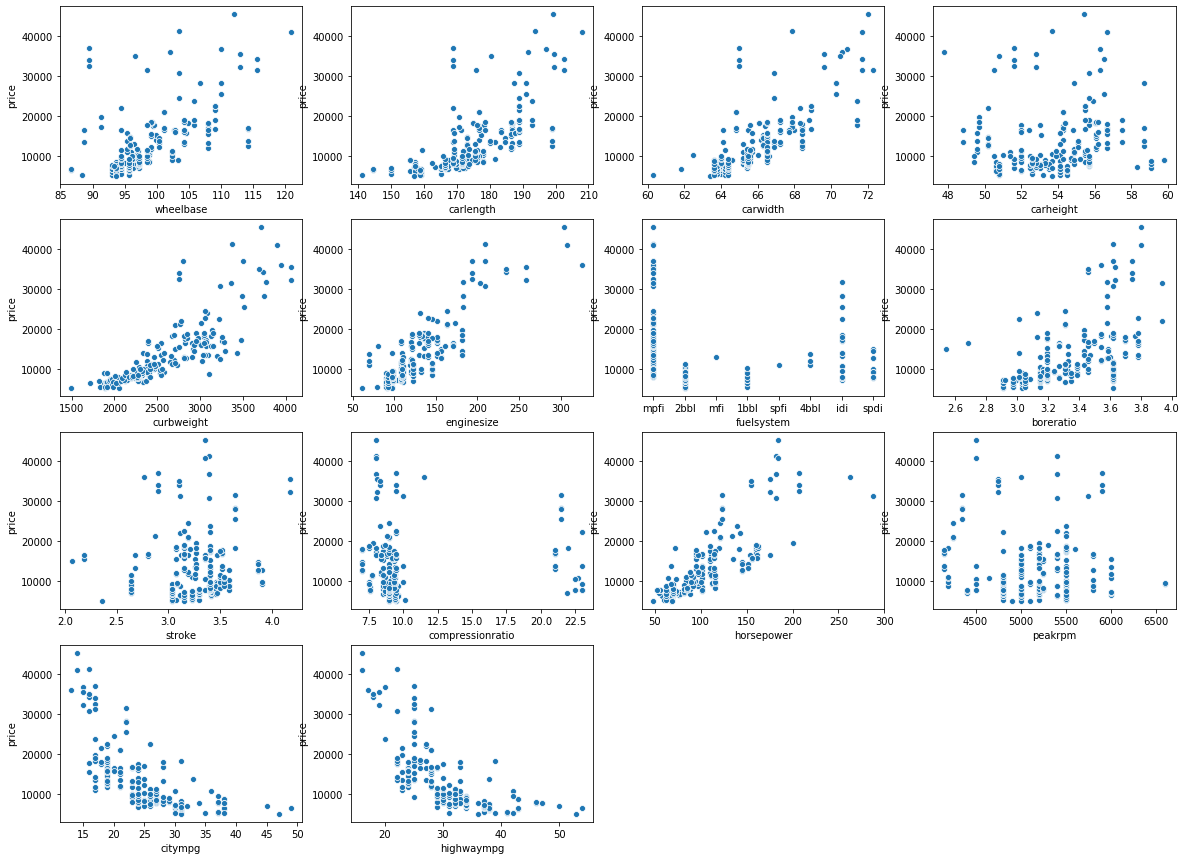

In [11]:
#scatter plot for numerical variable
col=("wheelbase","carlength","carwidth","carheight","curbweight","enginesize","fuelsystem","boreratio","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg")
plt.figure(figsize=(20,15))
for i in range(0,len(col)):
    plt.subplot(4,4,i+1)
    sns.scatterplot(x=col[i],
            y="price",data=df)
plt.show()

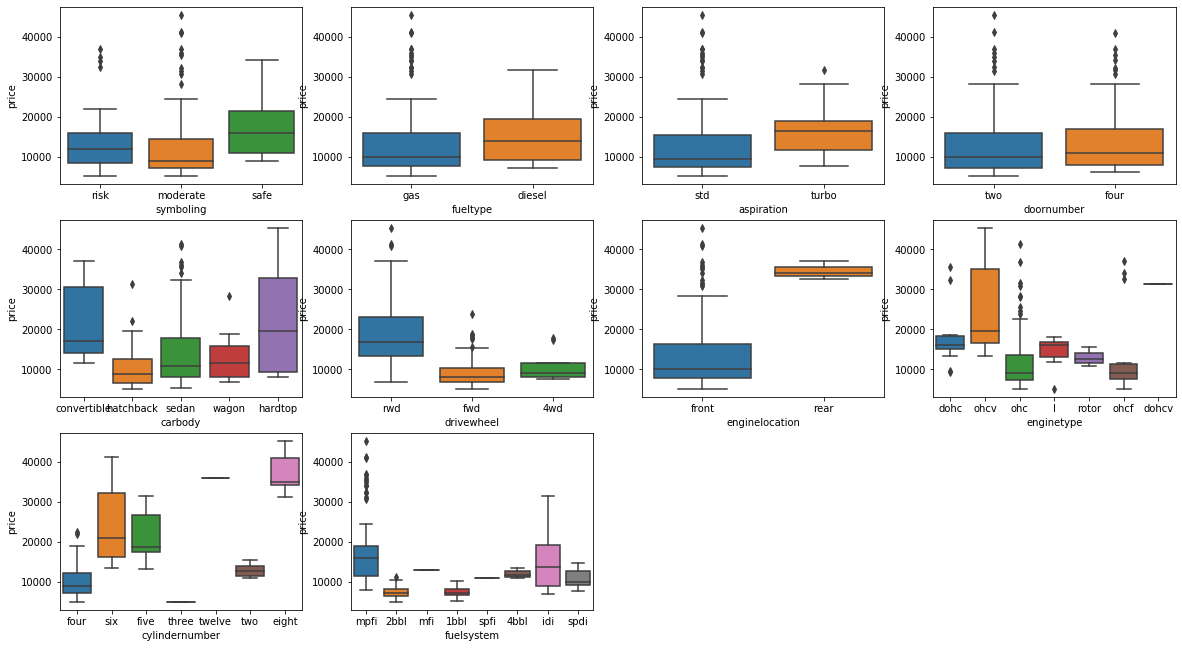

In [12]:
# categoricalvalue by using box plot
plt.figure(figsize=(20,15))
col=("symboling","fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","enginetype","cylindernumber","fuelsystem")
for i in range(0,len(col)):
    plt.subplot(4,4,(i+1))
    sns.boxplot(x=col[i],y="price",data=df)
plt.show()

we can clearly see  there is clear relation between engine location and price

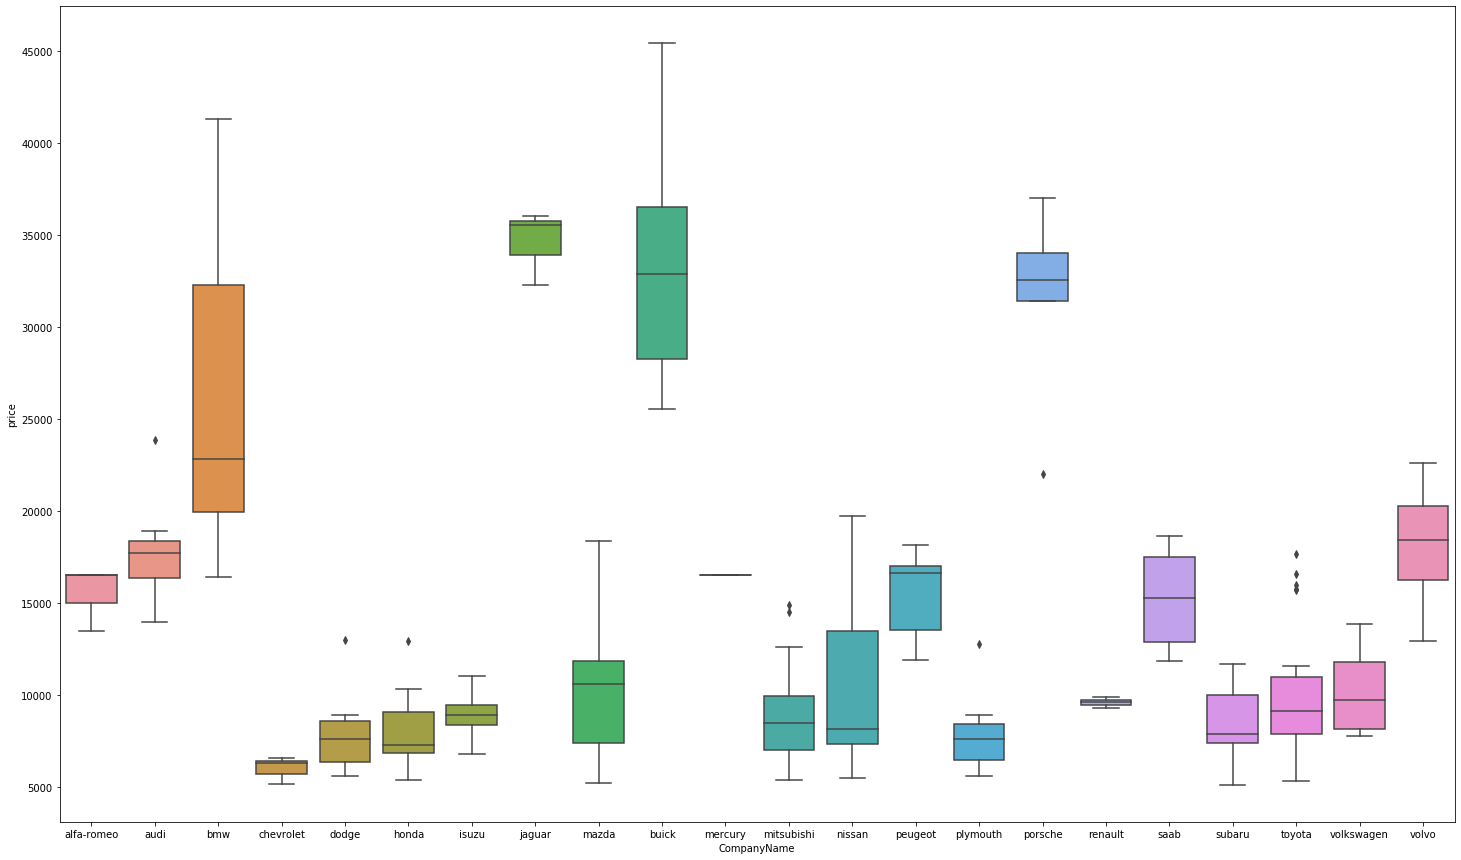

In [13]:
plt.figure(figsize=(25,15))
sns.boxplot(x="CompanyName",y="price",data=df)
plt.show()

In [14]:
# convert categorical values to numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["fueltype"]=le.fit_transform(df['fueltype'])
df["aspiration"]=le.fit_transform(df['aspiration'])
df["doornumber"]=le.fit_transform(df['doornumber'])
df["enginelocation"]=le.fit_transform(df['enginelocation'])
df.head()
df.drop(["CarName",'CompanyName'],axis=1,inplace=True)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,
1,risk,1,0,1,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,risk,1,0,1,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,moderate,1,0,1,hatchback,rwd,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,risk,1,0,0,sedan,fwd,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,risk,1,0,0,sedan,4wd,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [15]:
# converting categorical variables to dummy variables 
df = pd.get_dummies(df)
df.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_moderate,symboling_risk,symboling_safe,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,1,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,1,0,0,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [16]:
# df["symboling"] = pd.get_dummies(df.symboling, prefix='symboling', drop_first=True)
# df["carbody"] = pd.get_dummies(df.carbody, drop_first=True)
# df["drivewheel" ]= pd.get_dummies(df.drivewheel, drop_first=True)
# df["enginetype"] = pd.get_dummies(df.enginetype, prefix='enginetype', drop_first=True)
# df["fuelsystem"] = pd.get_dummies(df.fuelsystem, prefix='fuelsystem', drop_first=True)
# df["cylindernumber"] = pd.get_dummies(df.cylindernumber, prefix='#ofCylinder', drop_first=True)
# #Now that we have created dummy variables for the above mentioned varibles, we need to drop those variables.
# li = [df["symboling"],df["carbody"],df["drivewheel"],df["enginetype"],df["fuelsystem"],df["cylindernumber"]]
# for i in li:
#     price = pd.concat([df,li],axis=1)
# df.drop(columns=['CarName','symboling','CompanyName','carbody','drivewheel','enginetype','fuelsystem','cylindernumber'], inplace=True)
#df.head()


,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_moderate,symboling_risk,symboling_safe,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,1,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,1,0,0,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [17]:
# after dummy variable convertion from object variables to integer variable
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 51 columns):
fueltype                 205 non-null int32
aspiration               205 non-null int32
doornumber               205 non-null int32
enginelocation           205 non-null int32
wheelbase                205 non-null float64
carlength                205 non-null float64
carwidth                 205 non-null float64
carheight                205 non-null float64
curbweight               205 non-null int64
enginesize               205 non-null int64
boreratio                205 non-null float64
stroke                   205 non-null float64
compressionratio         205 non-null float64
horsepower               205 non-null int64
peakrpm                  205 non-null int64
citympg                  205 non-null int64
highwaympg               205 non-null int64
price                    205 non-null float64
symboling_moderate       205 non-null uint8
symboling_risk           205 non-null uint8

# Splitting data into train and test data set

In [18]:
from sklearn.model_selection import train_test_split
#creation of train and test data set  as 70:30
df_train,df_test=train_test_split(df,train_size=0.7,test_size=.3,random_state=100)

In [19]:
print(df_train.shape)
print(df_test.shape)

(143, 51)
(62, 51)


In [20]:
# checking the train head data set
df_train.head()


,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_moderate,symboling_risk,symboling_safe,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
123,1,0,0,0,93.7,167.3,63.8,50.8,2191,98,2.97,3.23,9.4,68,5500,31,38,7609.0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
126,1,0,1,0,94.5,168.9,68.3,50.2,2778,151,3.94,3.11,9.5,143,5500,19,27,22018.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
167,1,0,1,0,94.5,168.7,64.0,52.6,2300,98,3.24,3.08,9.4,112,6600,26,29,9538.0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
200,1,1,0,0,104.3,188.8,67.2,57.5,3157,130,3.62,3.15,7.5,162,5100,17,22,18950.0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [21]:
# checking statistical datframe
df_train.describe()


,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_moderate,symboling_risk,symboling_safe,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.909091,0.181818,0.440559,0.006993,98.523077,173.416783,65.839860,53.551748,2539.510490,124.958042,3.307413,3.250070,10.052587,102.552448,5130.069930,25.391608,30.874126,13056.347322,0.650350,0.244755,0.104895,0.027972,0.020979,0.342657,0.475524,0.132867,0.055944,0.594406,0.349650,0.069930,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.020979,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.055944,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,0.288490,0.387050,0.498199,0.083624,5.961835,12.598122,2.214203,2.433766,544.650539,40.974034,0.260997,0.312529,3.794890,39.722750,481.273979,6.701939,6.973660,7807.036883,0.478536,0.431453,0.307495,0.165472,0.143818,0.476266,0.501156,0.340624,0.230621,0.492733,0.478536,0.255926,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.143818,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.230621,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.680000,2.190000,7.000000,48.000000,4150.000000,13.000000,17.000000,5118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,1.000000,0.000000,0.000000,0.000000,94.500000,165.650000,63.950000,51.800000,2121.000000,97.000000,3.065000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7554.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,1.000000,0.000000,0.000000,0.000000,96.500000,172.000000,65.400000,53.700000,2405.000000,110.000000,3.310000,3.270000,9.000000,94.000000,5200.000000,25.000000,31.000000,10198.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,1.000000,0.000000,1.000000,0.000000,101.200000,182.300000,66.900000,55.350000,2930.500000,141.000000,3.540000,3.400000,9.400000,116.000000,5500.000000,31.000000,36.500000,16465.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000

In [22]:
#scaling by using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
# Some variable are out of scale
li=["wheelbase","carlength",'carwidth','carheight',"curbweight",'enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
df_train[li]=scaler.fit_transform(df_train[li])
df_train.head()

C:\Users\Prathima CN\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Prathima CN\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_moderate,symboling_risk,symboling_safe,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
123,1,0,0,0,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.068818,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
126,1,0,1,0,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0.466890,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
167,1,0,1,0,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.122110,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,1,0,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0.314446,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
200,1,1,0,0,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0.382131,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [23]:
# to cjeck the statstical dataa of the train data
df_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_moderate,symboling_risk,symboling_safe,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.909091,0.181818,0.440559,0.006993,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,0.219310,0.650350,0.244755,0.104895,0.027972,0.020979,0.342657,0.475524,0.132867,0.055944,0.594406,0.349650,0.069930,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.020979,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.055944,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,0.215682,0.478536,0.431453,0.307495,0.165472,0.143818,0.476266,0.501156,0.340624,0.230621,0.492733,0.478536,0.255926,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.143818,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.230621,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,1.000000,0.000000,0.000000,0.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216,0.067298,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,1.000000,0.000000,0.000000,0.000000,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,0.428571,0.333333,0.378378,0.140343,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,1.000000,0.000000,1.000000,0.000000,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,0.283333,0.551020,0.500000,0.527027,0.313479,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.0000

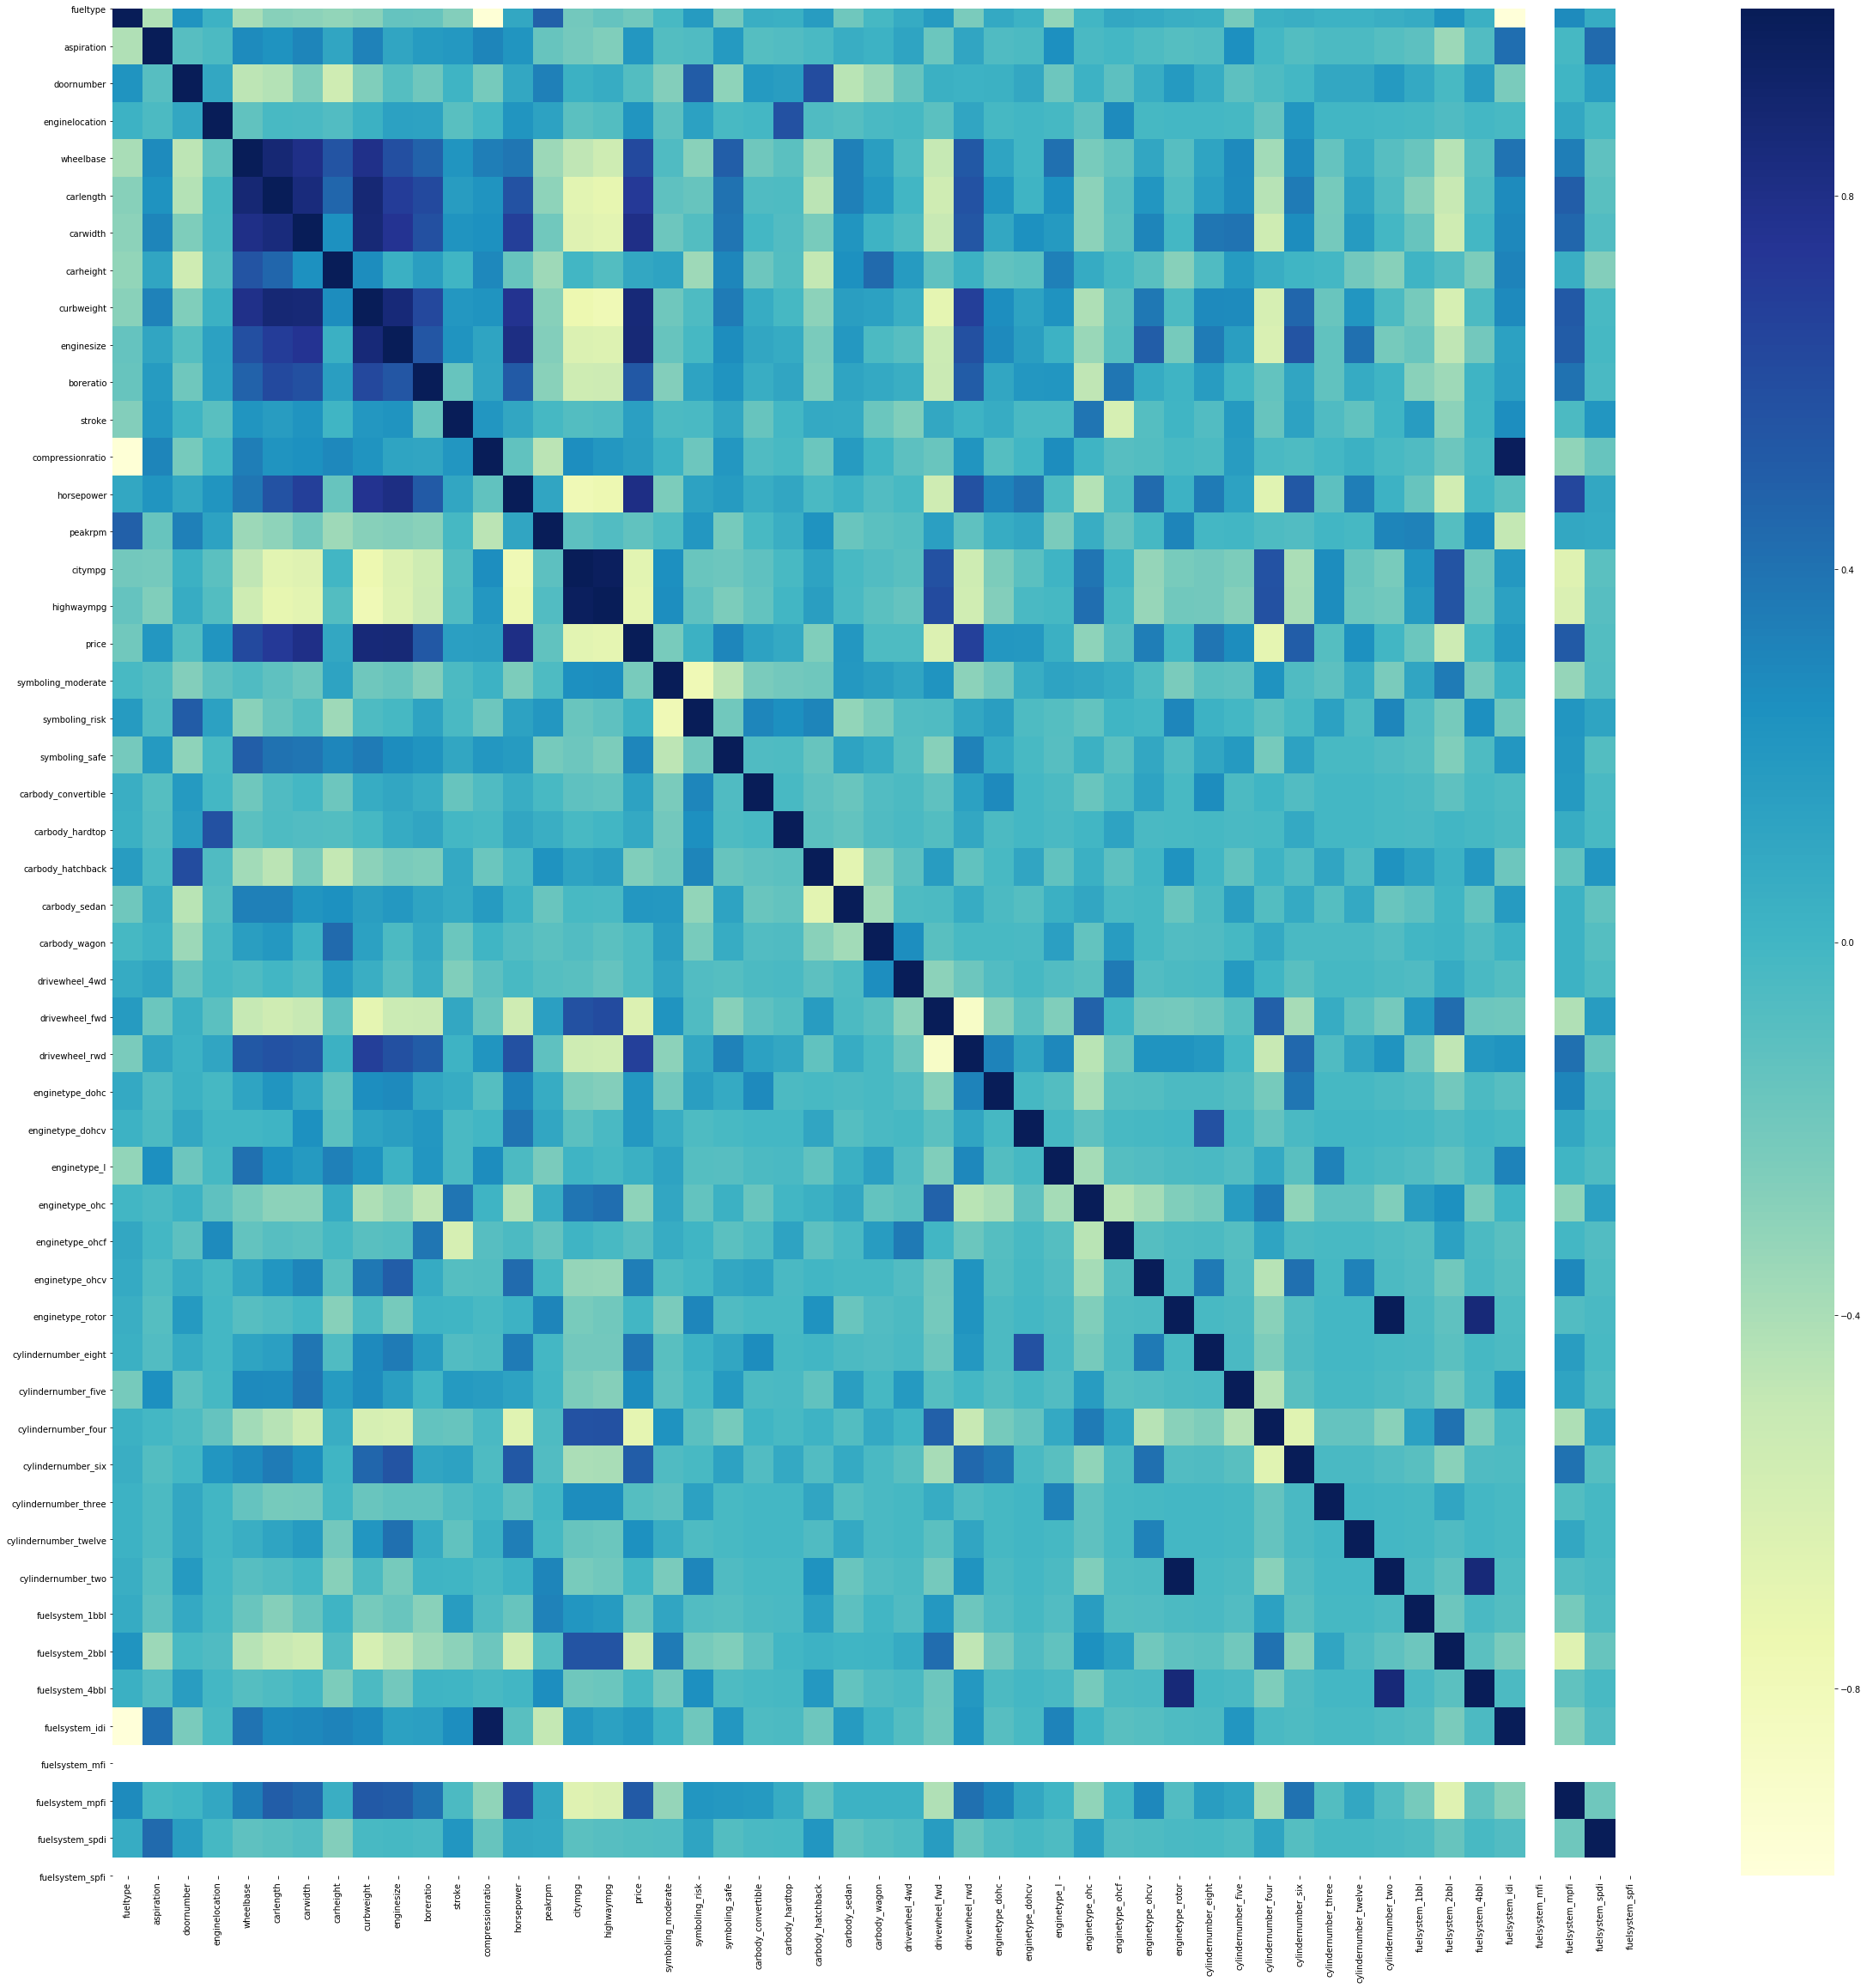

In [24]:
# to find co-relation on train set
plt.figure(figsize=(40,40))
sns.heatmap(df_train.corr(),cmap='YlGnBu')

In [25]:
#finding the corelation with respect to price
cor=df_train.corr().iloc[[17]]
cor

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_moderate,symboling_risk,symboling_safe,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
price,-0.19115,0.20654,-0.075936,0.226217,0.622591,0.713749,0.79938,0.096631,0.86186,0.867915,0.533591,0.15282,0.160847,0.806183,-0.127431,-0.67429,-0.688389,1.0,-0.220376,0.031659,0.298536,0.133124,0.089735,-0.252484,0.205018,-0.051173,-0.047979,-0.635202,0.677169,0.209311,0.197875,0.044246,-0.297108,-0.089985,0.339468,-0.000793,0.385555,0.27143,-0.695256,0.500613,-0.085274,0.247489,-0.000793,-0.171664,-0.537919,-0.017148,0.19115,NaN,0.519993,-0.07324,NaN


# Buliding the model

Use of RFE  method

In [26]:
y_train=df_train.pop("price")
X_train=df_train

In [27]:
#import the sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [28]:
# creating object for linear regression
lm=LinearRegression()
# fitting data to X and y train
lm.fit(X_train,y_train)
#selecting the top 15 features
rfe=RFE(lm,15)
rfe=rfe.fit(X_train,y_train)


In [29]:
#listing the raking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 15),
 ('aspiration', False, 4),
 ('doornumber', False, 30),
 ('enginelocation', True, 1),
 ('wheelbase', False, 2),
 ('carlength', False, 17),
 ('carwidth', True, 1),
 ('carheight', False, 14),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 28),
 ('horsepower', True, 1),
 ('peakrpm', False, 3),
 ('citympg', False, 11),
 ('highwaympg', True, 1),
 ('symboling_moderate', False, 22),
 ('symboling_risk', False, 23),
 ('symboling_safe', False, 10),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', False, 16),
 ('carbody_hatchback', False, 21),
 ('carbody_sedan', False, 33),
 ('carbody_wagon', False, 32),
 ('drivewheel_4wd', False, 31),
 ('drivewheel_fwd', False, 29),
 ('drivewheel_rwd', False, 12),
 ('enginetype_dohc', False, 7),
 ('enginetype_dohcv', False, 6),
 ('enginetype_l', False, 9),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', False, 13),
 ('enginetype_ohcv', True, 1),
 (

In [30]:
#listing the top 15 features
col=X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'horsepower', 'highwaympg', 'carbody_convertible',
       'enginetype_ohc', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

# Building using stats

In [31]:
import statsmodels.api as sm

In [32]:
#Creating X_train_rfe which will contain only the top 15 selected columns from the X_train dataset.
X_train_rfe=X_train[col]
# training the model
X_train_rfe=sm.add_constant(X_train_rfe)
#Applying the linearRegression model on the X_train_rfe and fitting the training dataset.
lr_1=sm.OLS(y_train,X_train_rfe).fit()
lr_1.summary()

C:\Users\Prathima CN\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     111.2
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           1.88e-64
Time:                        15:27:19   Log-Likelihood:                 201.24
No. Observations:                 143   AIC:                            -372.5
Df Residuals:                     128   BIC:                            -328.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1703      0.047     -3.611      0.000      -0.264      -0.077
enginelocation            0.2889      0.070      4.102      0.000       0.150       0.428
carwidth                  0.2662      0.063      4.257      0.000       0.142       0.390
curbweight                0.3064      0.084      3.660      0.000       0.141       0.472
enginesize                1.0872      0.121      8.977      0.000       0.848       1.327
boreratio                -0.1661      0.041     -4.069      0.000      -0.247      -0.085
stroke                   -0.3863      0.050     -7.707      0.000      -0.486      -0.287
horsepower                0.2076      0.070      2.964      0.004       0.069       0.346
highwaympg                0.0938      0.057      1.649      0.102      -0.019       0.206
carbody_convertible       0.0833      0.034      2.451      0.016       0.016       0.151
enginetype_ohc            0.1184      0.018      6.706      0.000       0.083       0.153
enginetype_ohcv          -0.1148      0.030     -3.799      0.000      -0.175      -0.055
enginetype_rotor          0.1685      0.021      7.940      0.000       0.127       0.211
cylindernumber_three      0.2742      0.069      3.971      0.000       0.138       0.411
cylindernumber_twelve    -0.4305      0.083     -5.156      0.000      -0.596      -0.265
cylindernumber_two        0.1685      0.021      7.940      0.000       0.127       0.211
==============================================================================
Omnibus:                       24.640   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.681
Skew:                           0.650   Prob(JB):                     1.49e-14
Kurtosis:                       5.999   Cond. No.                     9.04e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.7e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

highwaympg p-value is high so drop from train data frame.

In [33]:
X_train_new = X_train_rfe.drop(columns=['highwaympg'])

In [34]:
X_train_lm = sm.add_constant(X_train_new)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     118.0
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           6.43e-65
Time:                        15:27:20   Log-Likelihood:                 199.74
No. Observations:                 143   AIC:                            -371.5
Df Residuals:                     129   BIC:                            -330.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1116      0.031     -3.586      0.000      -0.173      -0.050
enginelocation            0.2935      0.071      4.144      0.000       0.153       0.434
carwidth                  0.2750      0.063      4.385      0.000       0.151       0.399
curbweight                0.2439      0.075      3.246      0.001       0.095       0.393
enginesize                1.1216      0.120      9.340      0.000       0.884       1.359
boreratio                -0.1685      0.041     -4.102      0.000      -0.250      -0.087
stroke                   -0.3776      0.050     -7.526      0.000      -0.477      -0.278
horsepower                0.1559      0.063      2.473      0.015       0.031       0.281
carbody_convertible       0.0748      0.034      2.212      0.029       0.008       0.142
enginetype_ohc            0.1161      0.018      6.554      0.000       0.081       0.151
enginetype_ohcv          -0.1182      0.030     -3.893      0.000      -0.178      -0.058
enginetype_rotor          0.1601      0.021      7.720      0.000       0.119       0.201
cylindernumber_three      0.3035      0.067      4.518      0.000       0.171       0.436
cylindernumber_twelve    -0.4229      0.084     -5.040      0.000      -0.589      -0.257
cylindernumber_two        0.1601      0.021      7.720      0.000       0.119       0.201
==============================================================================
Omnibus:                       26.366   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.668
Skew:                           0.689   Prob(JB):                     4.51e-16
Kurtosis:                       6.156   Cond. No.                     1.60e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.43e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#All features are acceptable for p-value, so calculate VIF 

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_new = X_train_new.drop(columns=['const'])
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\Prathima CN\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
10,enginetype_rotor,inf
13,cylindernumber_two,inf
2,curbweight,42.72
3,enginesize,36.86
1,carwidth,34.20
5,stroke,18.98
6,horsepower,11.19
4,boreratio,10.33
8,enginetype_ohc,6.90
9,enginetype_ohcv,1.80


High VIF so remove "enginetype_rotor"

In [36]:
X_train_new = X_train_new.drop(columns=['enginetype_rotor'])

X_train_lm = sm.add_constant(X_train_new)

lr_3 = sm.OLS(y_train, X_train_lm).fit()
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     118.0
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           6.43e-65
Time:                        15:27:21   Log-Likelihood:                 199.74
No. Observations:                 143   AIC:                            -371.5
Df Residuals:                     129   BIC:                            -330.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1116      0.031     -3.586      0.000      -0.173      -0.050
enginelocation            0.2935      0.071      4.144      0.000       0.153       0.434
carwidth                  0.2750      0.063      4.385      0.000       0.151       0.399
curbweight                0.2439      0.075      3.246      0.001       0.095       0.393
enginesize                1.1216      0.120      9.340      0.000       0.884       1.359
boreratio                -0.1685      0.041     -4.102      0.000      -0.250      -0.087
stroke                   -0.3776      0.050     -7.526      0.000      -0.477      -0.278
horsepower                0.1559      0.063      2.473      0.015       0.031       0.281
carbody_convertible       0.0748      0.034      2.212      0.029       0.008       0.142
enginetype_ohc            0.1161      0.018      6.554      0.000       0.081       0.151
enginetype_ohcv          -0.1182      0.030     -3.893      0.000      -0.178      -0.058
cylindernumber_three      0.3035      0.067      4.518      0.000       0.171       0.436
cylindernumber_twelve    -0.4229      0.084     -5.040      0.000      -0.589      -0.257
cylindernumber_two        0.3202      0.041      7.720      0.000       0.238       0.402
==============================================================================
Omnibus:                       26.366   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.668
Skew:                           0.689   Prob(JB):                     4.51e-16
Kurtosis:                       6.156   Cond. No.                         44.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,42.72
3,enginesize,36.86
1,carwidth,34.20
5,stroke,18.98
6,horsepower,11.19
4,boreratio,10.33
8,enginetype_ohc,6.90
9,enginetype_ohcv,1.80
12,cylindernumber_two,1.72
11,cylindernumber_twelve,1.66


drop  curbweight as high VIf value

In [38]:
X_train_new = X_train_new.drop(columns=['curbweight'])

X_train_lm = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train, X_train_lm).fit()
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     118.3
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           8.81e-64
Time:                        15:27:21   Log-Likelihood:                 194.12
No. Observations:                 143   AIC:                            -362.2
Df Residuals:                     130   BIC:                            -323.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1065      0.032     -3.305      0.001      -0.170      -0.043
enginelocation            0.2577      0.072      3.555      0.001       0.114       0.401
carwidth                  0.3889      0.054      7.222      0.000       0.282       0.495
enginesize                1.3238      0.106     12.445      0.000       1.113       1.534
boreratio                -0.1621      0.042     -3.814      0.000      -0.246      -0.078
stroke                   -0.3792      0.052     -7.294      0.000      -0.482      -0.276
horsepower                0.1556      0.065      2.381      0.019       0.026       0.285
carbody_convertible       0.0737      0.035      2.104      0.037       0.004       0.143
enginetype_ohc            0.1042      0.018      5.802      0.000       0.069       0.140
enginetype_ohcv          -0.1332      0.031     -4.282      0.000      -0.195      -0.072
cylindernumber_three      0.2978      0.070      4.281      0.000       0.160       0.435
cylindernumber_twelve    -0.4837      0.085     -5.708      0.000      -0.651      -0.316
cylindernumber_two        0.3400      0.043      7.999      0.000       0.256       0.424
==============================================================================
Omnibus:                       23.788   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.542
Skew:                           0.665   Prob(JB):                     8.69e-13
Kurtosis:                       5.749   Cond. No.                         37.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,26.19
1,carwidth,22.93
4,stroke,18.97
5,horsepower,11.19
3,boreratio,10.22
7,enginetype_ohc,6.62
8,enginetype_ohcv,1.77
11,cylindernumber_two,1.69
10,cylindernumber_twelve,1.58
0,enginelocation,1.20


Do not drop engine size, as value of  R_square reduces very high, we are considering next VIF value i.e. carwidth

In [40]:
X_train_new = X_train_new.drop(columns=['carwidth'])

X_train_lm = sm.add_constant(X_train_new)

lr_5 = sm.OLS(y_train, X_train_lm).fit()
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     89.37
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           2.52e-55
Time:                        15:27:22   Log-Likelihood:                 170.00
No. Observations:                 143   AIC:                            -316.0
Df Residuals:                     131   BIC:                            -280.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0571      0.037     -1.538      0.127      -0.130       0.016
enginelocation            0.1019      0.082      1.248      0.214      -0.060       0.263
enginesize                1.6246      0.115     14.075      0.000       1.396       1.853
boreratio                -0.0939      0.049     -1.922      0.057      -0.191       0.003
stroke                   -0.3659      0.061     -5.972      0.000      -0.487      -0.245
horsepower                0.2245      0.076      2.947      0.004       0.074       0.375
carbody_convertible       0.0359      0.041      0.878      0.381      -0.045       0.117
enginetype_ohc            0.1092      0.021      5.162      0.000       0.067       0.151
enginetype_ohcv          -0.1439      0.037     -3.928      0.000      -0.216      -0.071
cylindernumber_three      0.2303      0.081      2.833      0.005       0.070       0.391
cylindernumber_twelve    -0.6013      0.098     -6.130      0.000      -0.795      -0.407
cylindernumber_two        0.3926      0.049      7.950      0.000       0.295       0.490
==============================================================================
Omnibus:                        7.367   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                7.947
Skew:                           0.388   Prob(JB):                       0.0188
Kurtosis:                       3.855   Cond. No.                         33.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

carbody_convertible has high p-value, so droping the carbody_conertible

In [41]:
X_train_new = X_train_new.drop(columns=['carbody_convertible'])

X_train_lm = sm.add_constant(X_train_new)

lr_6 = sm.OLS(y_train, X_train_lm).fit()
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     98.40
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           3.62e-56
Time:                        15:27:22   Log-Likelihood:                 169.58
No. Observations:                 143   AIC:                            -317.2
Df Residuals:                     132   BIC:                            -284.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0504      0.036     -1.389      0.167      -0.122       0.021
enginelocation            0.0978      0.081      1.201      0.232      -0.063       0.259
enginesize                1.6431      0.113     14.493      0.000       1.419       1.867
boreratio                -0.0989      0.048     -2.039      0.043      -0.195      -0.003
stroke                   -0.3765      0.060     -6.276      0.000      -0.495      -0.258
horsepower                0.2187      0.076      2.883      0.005       0.069       0.369
enginetype_ohc            0.1084      0.021      5.135      0.000       0.067       0.150
enginetype_ohcv          -0.1442      0.037     -3.942      0.000      -0.217      -0.072
cylindernumber_three      0.2291      0.081      2.821      0.006       0.068       0.390
cylindernumber_twelve    -0.6144      0.097     -6.345      0.000      -0.806      -0.423
cylindernumber_two        0.3949      0.049      8.015      0.000       0.297       0.492
==============================================================================
Omnibus:                        6.615   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                7.009
Skew:                           0.357   Prob(JB):                       0.0301
Kurtosis:                       3.816   Cond. No.                         33.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Drop the engine location from train data set as it has high p value

In [42]:
X_train_new = X_train_new.drop(columns=['enginelocation'])

X_train_lm = sm.add_constant(X_train_new)

lr_7 = sm.OLS(y_train, X_train_lm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     108.8
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           6.85e-57
Time:                        15:27:22   Log-Likelihood:                 168.81
No. Observations:                 143   AIC:                            -317.6
Df Residuals:                     133   BIC:                            -288.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0466      0.036     -1.287      0.200      -0.118       0.025
enginesize                1.6520      0.113     14.578      0.000       1.428       1.876
boreratio                -0.1033      0.048     -2.133      0.035      -0.199      -0.008
stroke                   -0.3878      0.059     -6.532      0.000      -0.505      -0.270
horsepower                0.2336      0.075      3.118      0.002       0.085       0.382
enginetype_ohc            0.1085      0.021      5.129      0.000       0.067       0.150
enginetype_ohcv          -0.1510      0.036     -4.172      0.000      -0.223      -0.079
cylindernumber_three      0.2309      0.081      2.838      0.005       0.070       0.392
cylindernumber_twelve    -0.6274      0.096     -6.508      0.000      -0.818      -0.437
cylindernumber_two        0.3952      0.049      8.008      0.000       0.298       0.493
==============================================================================
Omnibus:                        5.159   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.076   Jarque-Bera (JB):                5.225
Skew:                           0.294   Prob(JB):                       0.0733
Kurtosis:                       3.728   Cond. No.                         33.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

No high pvalues so checking VIF value

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,22.74
2,stroke,17.76
3,horsepower,10.49
1,boreratio,7.81
4,enginetype_ohc,6.51
5,enginetype_ohcv,1.73
8,cylindernumber_two,1.64
7,cylindernumber_twelve,1.52
6,cylindernumber_three,1.07


drop the stroke as high VIF value

In [44]:
X_train_new = X_train_new.drop(columns=['stroke'])

X_train_lm = sm.add_constant(X_train_new)

lr_8 = sm.OLS(y_train, X_train_lm).fit()
lr_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     89.31
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           6.52e-50
Time:                        15:27:23   Log-Likelihood:                 148.91
No. Observations:                 143   AIC:                            -279.8
Df Residuals:                     134   BIC:                            -253.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1821      0.034     -5.354      0.000      -0.249      -0.115
enginesize                1.2375      0.107     11.512      0.000       1.025       1.450
boreratio                 0.0110      0.052      0.213      0.832      -0.091       0.113
horsepower                0.2840      0.085      3.327      0.001       0.115       0.453
enginetype_ohc            0.0476      0.022      2.189      0.030       0.005       0.091
enginetype_ohcv          -0.0976      0.040     -2.417      0.017      -0.177      -0.018
cylindernumber_three      0.1810      0.093      1.952      0.053      -0.002       0.364
cylindernumber_twelve    -0.3654      0.100     -3.640      0.000      -0.564      -0.167
cylindernumber_two        0.2682      0.052      5.165      0.000       0.166       0.371
==============================================================================
Omnibus:                        3.835   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.147   Jarque-Bera (JB):                4.101
Skew:                           0.160   Prob(JB):                        0.129
Kurtosis:                       3.765   Cond. No.                         24.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Drop the boreratio as high p value 

In [45]:
X_train_new = X_train_new.drop(columns=['boreratio'])

X_train_lm = sm.add_constant(X_train_new)

lr_9 = sm.OLS(y_train, X_train_lm).fit()
lr_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     102.8
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           6.32e-51
Time:                        15:27:23   Log-Likelihood:                 148.89
No. Observations:                 143   AIC:                            -281.8
Df Residuals:                     135   BIC:                            -258.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1772      0.025     -7.098      0.000      -0.227      -0.128
enginesize                1.2464      0.099     12.649      0.000       1.052       1.441
horsepower                0.2843      0.085      3.344      0.001       0.116       0.452
enginetype_ohc            0.0455      0.019      2.346      0.020       0.007       0.084
enginetype_ohcv          -0.1011      0.037     -2.742      0.007      -0.174      -0.028
cylindernumber_three      0.1781      0.091      1.948      0.053      -0.003       0.359
cylindernumber_twelve    -0.3686      0.099     -3.728      0.000      -0.564      -0.173
cylindernumber_two        0.2685      0.052      5.191      0.000       0.166       0.371
==============================================================================
Omnibus:                        3.847   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                4.090
Skew:                           0.165   Prob(JB):                        0.129
Kurtosis:                       3.760   Cond. No.                         22.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Drop the cylindernumber_three as high p value

In [46]:
X_train_new = X_train_new.drop(columns=['cylindernumber_three'])

X_train_lm = sm.add_constant(X_train_new)

lr_10 = sm.OLS(y_train, X_train_lm).fit()
lr_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     116.9
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           3.59e-51
Time:                        15:27:23   Log-Likelihood:                 146.90
No. Observations:                 143   AIC:                            -279.8
Df Residuals:                     136   BIC:                            -259.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1639      0.024     -6.756      0.000      -0.212      -0.116
enginesize                1.2260      0.099     12.386      0.000       1.030       1.422
horsepower                0.2782      0.086      3.241      0.001       0.108       0.448
enginetype_ohc            0.0375      0.019      1.959      0.052      -0.000       0.075
enginetype_ohcv          -0.1016      0.037     -2.730      0.007      -0.175      -0.028
cylindernumber_twelve    -0.3554      0.100     -3.567      0.000      -0.552      -0.158
cylindernumber_two        0.2577      0.052      4.960      0.000       0.155       0.360
==============================================================================
Omnibus:                        4.864   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                5.073
Skew:                           0.258   Prob(JB):                       0.0791
Kurtosis:                       3.765   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
X_train_new = X_train_new.drop(columns=['enginetype_ohc'])

X_train_lm = sm.add_constant(X_train_new)

lr_11 = sm.OLS(y_train, X_train_lm).fit()
lr_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     136.7
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           1.91e-51
Time:                        15:27:23   Log-Likelihood:                 144.91
No. Observations:                 143   AIC:                            -277.8
Df Residuals:                     137   BIC:                            -260.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1278      0.016     -8.022      0.000      -0.159      -0.096
enginesize                1.2200      0.100     12.205      0.000       1.022       1.418
horsepower                0.2470      0.085      2.899      0.004       0.078       0.415
enginetype_ohcv          -0.1206      0.036     -3.319      0.001      -0.192      -0.049
cylindernumber_twelve    -0.3388      0.100     -3.377      0.001      -0.537      -0.140
cylindernumber_two        0.2298      0.050      4.552      0.000       0.130       0.330
==============================================================================
Omnibus:                        7.708   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                9.342
Skew:                           0.348   Prob(JB):                      0.00936
Kurtosis:                       4.041   Cond. No.                         18.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

as no values are high p-values, so checeking VIF

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,10.23
1,horsepower,10.17
2,enginetype_ohcv,1.37
4,cylindernumber_two,1.17
3,cylindernumber_twelve,1.16


The value of VIF of horsepower is high so drop it

In [49]:
X_train_new = X_train_new.drop(columns=['horsepower'])

X_train_lm = sm.add_constant(X_train_new)

lr_12 = sm.OLS(y_train, X_train_lm).fit()
lr_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     160.1
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           8.20e-51
Time:                        15:27:24   Log-Likelihood:                 140.66
No. Observations:                 143   AIC:                            -271.3
Df Residuals:                     138   BIC:                            -256.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1286      0.016     -7.865      0.000      -0.161      -0.096
enginesize                1.4493      0.063     23.114      0.000       1.325       1.573
enginetype_ohcv          -0.1181      0.037     -3.169      0.002      -0.192      -0.044
cylindernumber_twelve    -0.3495      0.103     -3.397      0.001      -0.553      -0.146
cylindernumber_two        0.2840      0.048      5.898      0.000       0.189       0.379
==============================================================================
Omnibus:                        8.446   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                9.433
Skew:                           0.424   Prob(JB):                      0.00895
Kurtosis:                       3.930   Cond. No.                         14.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginetype_ohcv,1.37
0,enginesize,1.33
2,cylindernumber_twelve,1.15
3,cylindernumber_two,1.00


All p valueslessthan 5% and VIF values less than 5%

# Residual analysis on train data

Checking if the error terms are also normally distributed. We will plot the histogram of the error terms and check whether it is normally distributed or not.

In [51]:
X_train_lm.shape

(143, 5)

In [52]:
y_train_price=lr_12.predict(X_train_lm)

Text(0.5, 0, 'Errors')

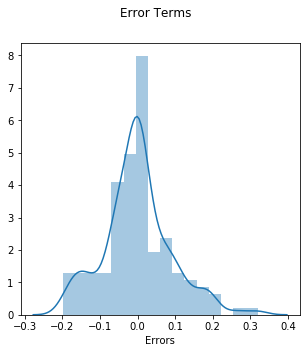

In [53]:
# Plotting histogram of the error terms
fig = plt.figure(figsize=(5,5))
sns.distplot((y_train - y_train_price))
fig.suptitle('Error Terms')
plt.xlabel('Errors')

As you can see the distribution is similar to normal distribution and the mean of the distribution is 0.

Predection on train and test data set

In [54]:
df_test.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_moderate,symboling_risk,symboling_safe,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0,62.0,62.0,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.887097,0.177419,0.435484,0.032258,99.295161,175.508065,66.064516,54.124194,2592.596774,131.403226,3.381290,3.267742,10.350000,107.725806,5113.709677,24.822581,30.467742,13784.967742,0.451613,0.387097,0.161290,0.032258,0.080645,0.338710,0.451613,0.096774,0.016129,0.564516,0.419355,0.032258,0.0,0.048387,0.806452,0.048387,0.064516,0.0,0.032258,0.032258,0.854839,0.080645,0.0,0.0,0.0,0.048387,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129
std,0.319058,0.385142,0.499868,0.178127,6.172983,11.681726,1.985282,2.438670,462.719100,43.147273,0.287889,0.318261,4.379039,39.210307,470.626488,6.192338,6.728256,8436.653035,0.501716,0.491062,0.370801,0.178127,0.274512,0.477134,0.501716,0.298064,0.127000,0.499868,0.497482,0.178127,0.0,0.216335,0.398304,0.216335,0.247676,0.0,0.178127,0.178127,0.355139,0.274512,0.0,0.0,0.0,0.216335,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000
min,0.000000,0.000000,0.000000,0.000000,86.600000,144.600000,62.500000,49.400000,1819.000000,79.000000,2.540000,2.070000,7.000000,52.000000,4150.000000,14.000000,16.000000,5399.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,95.700000,169.350000,64.600000,52.150000,2275.000000,108.000000,3.190000,3.150000,8.500000,73.750000,4800.000000,19.000000,25.000000,8460.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,97.850000,174.800000,65.600000,54.450000,2535.000000,121.000000,3.390000,3.350000,9.000000,100.500000,5000.000000,24.000000,30.000000,10873.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,103.150000,185.375000,66.500000,55.700000,2944.250000,144.750000,3.620000,3.460000,9.400000,119.000000,5475.000000,29.000000,34.000000,16601.250000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.750000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,120.900000,208.100000,7

In [55]:

#creating a list which will contain all the variables which are out of scale.
li = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke',
     'compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

#performing fit_transform() on the columns present in the above list.
df_test[li] = scaler.transform(df_test[li])
df_test.head()

C:\Users\Prathima CN\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Prathima CN\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_moderate,symboling_risk,symboling_safe,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
161,1,0,0,0,0.313793,0.409756,0.341667,0.460177,0.235066,0.139623,0.404762,0.424242,0.12500,0.091667,0.265306,0.694444,0.810811,0.072382,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
187,1,0,0,0,0.368966,0.497561,0.433333,0.699115,0.305275,0.181132,0.404762,0.611111,0.12500,0.154167,0.448980,0.388889,0.459459,0.093295,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
60,1,0,1,0,0.420690,0.596748,0.516667,0.522124,0.347944,0.230189,0.563492,0.606061,0.10000,0.150000,0.265306,0.361111,0.405405,0.102964,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
166,1,0,1,0,0.272414,0.448780,0.308333,0.424779,0.301396,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.115479,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
141,1,0,1,0,0.231034,0.263415,0.291667,0.699115,0.291699,0.177358,0.746032,0.227273,0.10625,0.104167,0.102041,0.361111,0.378378,0.068652,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [56]:
#creating X and ytest
X_test=df_test
y_test=df_test.pop("price")

In [57]:
# making predection on lr_12 model
X_test_new=X_test[X_train_new.columns]
# adding constant
X_test_new=sm.add_constant(X_test_new)

C:\Users\Prathima CN\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [58]:
# making predection
y_pred=lr_12.predict(X_test_new)

# Model Evaluation

Text(0, 0.5, 'y_pred')

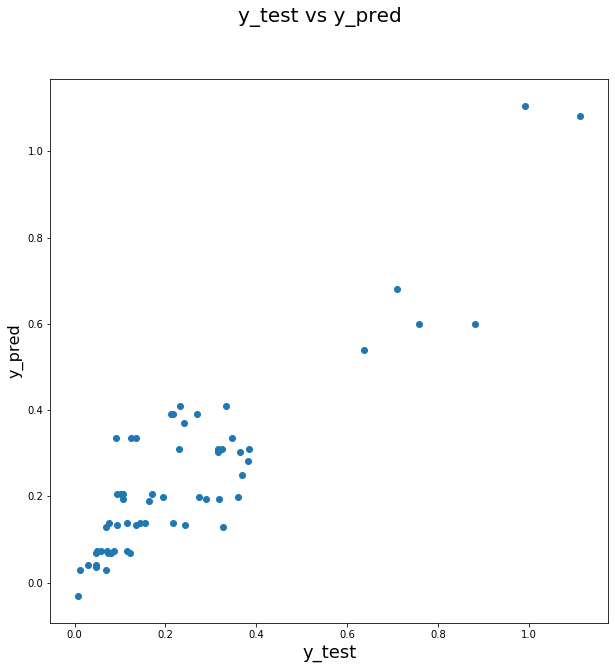

In [59]:
fig = plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [60]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.806654005872356


As the R_squared value on test set is 80%, it is a pretty good LinearRegression model and we can use this to predict the car price for Geely motors.

Therefore our model is 𝑝𝑟𝑖𝑐𝑒= -0.1286 + 1.4493enginesize - 0.1181enginetype_ohcv - 0.3495#ofCylinder_twelve + 0.2840#ofCylinder_two
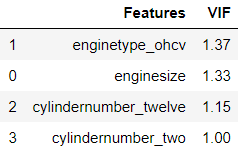